# Answering the Science Question

This notebook serves as a demo for answering the science question underlying the design of Mike's Calfornia Current regional model. You can follow and/or adapt this notebook based on your science question.

For reference, the science question for Mike's model is: **How do winds affect ocean temperature in the California Current?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = 'C:\\Users\\the_n\\Desktop\\sjsu\\F24\\CS185C\\project'

Then, re-create the model grid

In [3]:
# define the parameters that will be used in the data file
delX = 1/4
delY = 1/4
xgOrigin = 115
ygOrigin = -23
n_rows = 352
n_cols = 512

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)


## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results with and without wind. I'll choose one field near the end of my simulation:

In [4]:
# read in the grid with the tsunami
grid_tsunami = np.fromfile(os.path.join(project_dir,'run-tsunami','diags',
                                     'EtaN_hrly_snap',
                                     'EtaN_hrly_snap.0000014400.data'), '>f4')
grid_tsunami = grid_tsunami.reshape((2,n_rows,n_cols))

# read in the grid without the tsunami
grid_no_tsunami = np.fromfile(os.path.join(project_dir,'run','diags',
                                     'EtaN_hrly_snap',
                                     'EtaN_hrly_snap.0000014400.data'), '>f4')
grid_no_tsunami = grid_no_tsunami.reshape((2,n_rows,n_cols))

In [4]:
# plot the differences
C = plt.pcolormesh(grid_tsunami[0,:,:-1]-grid_no_tsunami[0,:,:-1],
                   cmap='viridis')
plt.colorbar(C)
plt.title('Model results (With tsunami - Without tsunmai)')
plt.show()

NameError: name 'grid_tsunami' is not defined

**This is where I would have observed the difference between my model run with the normal ETAN and the model run with the ETAN file with raised sea level that simulates the tsunami. If i was able to successfully run the models, I specificially be looking to see the seasurface height at the point of the simulated earthquake and a point very close to the coast of the Bay Area in California. Depending on how high the sea surface is at these points, especially at the bay, compared agaisnt what the normal sea surface should look like, would give me a good picture of how big of a tsunami would hit the Bay Area given a tsunami started at my specific test point.**

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [6]:
row = 125
col = 150

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [7]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(2008,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [8]:
timestep_dates = []
theta_wind_values = []
theta_no_wind_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run_no_wind','diags','TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the wind
        grid_wind = np.fromfile(os.path.join(project_dir,'run','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_wind = grid_wind.reshape((2,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_no_wind = np.fromfile(os.path.join(project_dir,'run_no_wind','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_no_wind = grid_no_wind.reshape((2,n_rows,n_cols))

        theta_wind_values.append(grid_wind[0,row,col])
        theta_no_wind_values.append(grid_no_wind[0,row,col])

Finally, I'll plot the timeseries to see the comparison:

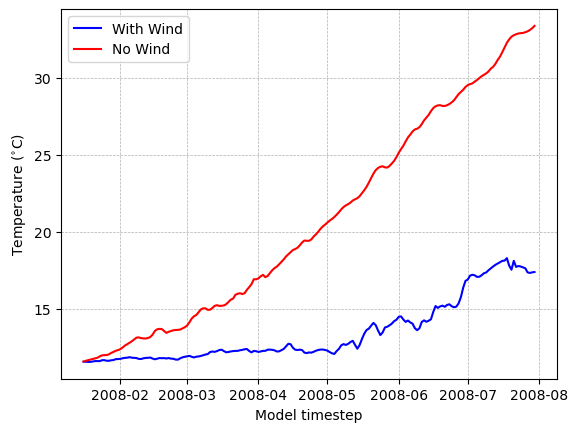

In [9]:
plt.plot(timestep_dates, theta_wind_values,'b-',label='With Wind')
plt.plot(timestep_dates, theta_no_wind_values,'r-',label='No Wind')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

**If I was able to get a model successfully running, I would have loved to analyze the height of the sea surface off the coast of the Bay Area on an hourly basis and calculate the potential impact if a tsunami wave of that size were to hit California. Depending on my calculated results, I also would have liked to test other initial points for a tsunami to start from and see how this caused the wave to differ in size and time it takes for the tsunami to hit the bay.**

**For a visualization movie, I probably would have made a plot of the Bay Area and shown the change in sea surface height each hour after the tsunami-creating earthquake happened. This likely would show that the seasurface height is normal for a few hours, then once the wave crossed the Pacific, you would be able to see the sea surface height rise. It is possible that a few more hours after the tsunami, their may be another smaller tsunami created from a tsunami wave created from the same earthquake went the other direction and hit the Eastern coast of Asia, then bounced back accross the Pacific creating smaller tsunami waves on the coast of california, sort of similar to an aftershock but with tsunami waves.**

**My science question also has never been more relavant with the threat of a tsunami hitting the Bay Area on December 7th 2024. This threat turned out to be unfounded as just a few hours after the warning, the warning was dismissed and no tsunami-sized waves were reported in the bay. It would be interesting to simulate this earthquake in MITgcm and see if there really was any threat of a tsunami in the Bay if there was a larger earthquake, or maybe it was simply impossible for a tsunami to hit the Bay origionating from that point off the coast of northern California.**